#### 머신러닝 프로젝트
- 데이터셋 : used_car_data.csv
- 목표 : 다양한 모델로 데이터셋 분석 및 모델 생성.



In [798]:
## [1-1] 모듈로딩 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from _utils import tools as ts, RegressionModule as rm
# from _utils.RegressionModule import RegressionModule as rm

In [799]:
originDF = pd.DataFrame(pd.read_csv('../Data/used_cars_data.csv',index_col='S.No.'))

In [800]:
carDF = originDF.copy()

컬럼설명<hr>
S.No.: 차량의 일련 번호 <br>
Name: 차량의 이름 (브랜드 이름과 모델 이름 포함)<br>
Location: 차량이 판매되거나 구매 가능한 위치 (도시)<br>
Year: 차량의 제조 연도<br>
Kilometers_driven: 이전 소유자가 차량을 운전한 총 거리 (KM 단위)<br>
Fuel_Type: 차량이 사용하는 연료 종류 (가솔린, 디젤, 전기, CNG, LPG)<br>
Transmission: 차량에 사용된 변속기 종류 (자동/수동)<br>
Owner: 차량의 소유 유형<br>
Mileage: 자동차 회사가 제공하는 표준 연비 (kmpl 또는 km/kg 단위)<br>
Engine: 차량 엔진의 배기량 (CC 단위)<br>
Power: 차량 엔진의 최대 출력 (bhp 단위)<br>
Seats: 차량의 좌석 수<br>
New_Price: 동일 모델의 새 차량 가격 (인도 루피 Lakhs 단위, 1 Lakh = 100,000 INR)<br>
Price: 중고차 가격 (인도 루피 Lakhs 단위, 1 Lakh = 100,000 INR<br>

In [801]:
carDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [802]:
carDF.shape

(7253, 13)

In [803]:
## 각 컬럼별 고유값 갯수 확인
## 범주형, 연속형 데이터 확인
for i in carDF.columns:
    print(i, len(carDF[i].unique()))

Name 2041
Location 11
Year 23
Kilometers_Driven 3660
Fuel_Type 5
Transmission 2
Owner_Type 4
Mileage 451
Engine 151
Power 387
Seats 10
New_Price 626
Price 1374


In [804]:
carDF.isna().sum()
## 널값 상태 확인
## mileeage, Engine, Seats
## engine nan == power 도 없음 46 개이므로 폐기
## New_Price            6247가 null 폐기
## price 1234개는 추후 확인

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [805]:
carDF = carDF.drop(columns='New_Price')
carDF = carDF.drop(index = carDF[carDF['Engine'].isna()].index)
carDF.loc[carDF['Seats'].isna(),'Seats'] = [5,5,5,7,5,5,5]
carDF.loc[carDF['Mileage'].isna(), 'Mileage'] = [0,0]

In [806]:
## name 컬럼 앞의 회사명은 범주형으로 사용가능.

In [807]:
carDF.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [808]:
## 수치지만 object인 컬럼 수정
# carDF['Mileage'] = carDF['Mileage'].apply(lambda x: x.split())
carDF['Mileage'] = carDF['Mileage'].apply(lambda x: str(x).split()[0] if isinstance(x, str) else x)
carDF["Engine"] = carDF["Engine"].apply(lambda x: str(x).split()[0])
carDF["Power"] = carDF["Power"].apply(lambda x: str(x).split()[0])

In [809]:
carDF.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1224
dtype: int64

In [810]:
carDF = carDF.drop(index=carDF[carDF['Power']=='null'].index)

In [811]:
#converting object data type to category data type
carDF["Fuel_Type"] = carDF["Fuel_Type"].astype("category")
carDF["Transmission"] = carDF["Transmission"].astype("category")
carDF["Owner_Type"] = carDF["Owner_Type"].astype("category")
#converting datatype  
carDF["Mileage"] = carDF["Mileage"].astype(float)
carDF["Power"] = carDF["Power"].astype(float)
carDF["Engine"]=carDF["Engine"].astype(float)

In [812]:
# 환율 (예시: 1 INR = 15 KRW)
exchange_rate = 16.75

# 중고차 가격을 한국 원화로 변환 후 백만 원 단위로 변환
carDF['Price'] = (carDF['Price'] * 100000 * exchange_rate) / 1000000

# 결과 출력
print(carDF[['Price']])

          Price
S.No.          
0       2.93125
1      20.93750
2       7.53750
3      10.05000
4      29.71450
...         ...
7248        NaN
7249        NaN
7250        NaN
7251        NaN
7252        NaN

[7078 rows x 1 columns]


In [813]:
## 차량 이름 앞의 브랜드명 추출하여 브랜드로, 모델명 추출하여 모델로
carDF['Brand'] = carDF['Name'].str.split(' ').str[0] #Separating Brand name from the Name
carDF['Model'] = carDF['Name'].str.split(' ').str[1] + carDF['Name'].str.split(' ').str[2]

carDF.Brand.unique()
## 'Isuzu', 'ISUZU' 같은걸로 보임.

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini',
       'OpelCorsa'], dtype=object)

In [814]:
carDF['Brand'] = carDF['Brand'].str.replace('ISUZU','Isuzu' )
carDF.loc[carDF['Model'].isna(),'Model'] = 'Corsa'

In [815]:
carDF["Brand"] = carDF["Brand"].astype("category")
carDF["Model"] = carDF["Model"].astype("category")

In [816]:
## 제조년도와 현재년도를 이용해 연식 계산

carDF['Current_year']=2025
carDF['Ageofcar']=carDF['Current_year']-carDF['Year']
carDF.drop('Current_year',axis=1,inplace=True)

In [817]:
carDF.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ageofcar
count,7078.000000,7.078000e+03,7078.000000,7078.000000,7078.000000,7078.000000,5876.000000,7078.000000
mean,2013.480503,5.825348e+04,18.268227,1620.717717,112.765214,5.284544,16.084464,11.519497
std,3.153077,8.521223e+04,4.369135,596.002717,53.493553,0.809451,18.837939,3.153077
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.737000,6.000000
25%,2012.000000,3.345875e+04,15.260000,1198.000000,75.000000,5.000000,5.891813,9.000000
50%,2014.000000,5.300000e+04,18.250000,1495.000000,94.000000,5.000000,9.631250,11.000000
75%,2016.000000,7.256600e+04,21.100000,1984.000000,138.100000,5.000000,16.770938,13.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,268.000000,27.000000


price의 널값 1200개 처리하기.
- 5876/7078 = 0.8301780163888104
- 약 17%. test size를 0.17로 처리했다고 생각하고. 
- 예측모델을 만든 후 price 가 null인 것을 예측 모델에 넣어 데이터 만들기

- target - Price
- feature - 이름을 제외한 모든 컬럼.

In [818]:
pnullDF = carDF.loc[carDF[carDF['Price'].isna()].index, :]
newDF = carDF.loc[carDF[~carDF['Price'].isna()].index, :]

In [819]:
carDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7078 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7078 non-null   object  
 1   Location           7078 non-null   object  
 2   Year               7078 non-null   int64   
 3   Kilometers_Driven  7078 non-null   int64   
 4   Fuel_Type          7078 non-null   category
 5   Transmission       7078 non-null   category
 6   Owner_Type         7078 non-null   category
 7   Mileage            7078 non-null   float64 
 8   Engine             7078 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7078 non-null   float64 
 11  Price              5876 non-null   float64 
 12  Brand              7078 non-null   category
 13  Model              7078 non-null   category
 14  Ageofcar           7078 non-null   int64   
dtypes: category(5), float64(5), int64(3), object(2)
memory usage

In [820]:
carDF.loc[carDF['Kilometers_Driven'] == 6500000, 'Kilometers_Driven'] = carDF['Kilometers_Driven'].mean()

C:\Users\KDP-34\AppData\Local\Temp\ipykernel_4508\4061406527.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '58253.479513987004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  carDF.loc[carDF['Kilometers_Driven'] == 6500000, 'Kilometers_Driven'] = carDF['Kilometers_Driven'].mean()


In [821]:
carDF

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Ageofcar
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,2.93125,Maruti,WagonR,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,20.93750,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,7.53750,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,10.05000,Maruti,ErtigaVDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,29.71450,Audi,A4New,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411.0,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,Volkswagen,VentoDiesel,14
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000.0,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,Volkswagen,PoloGT,10
7250,Nissan Micra Diesel XV,Kolkata,2012,28000.0,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,Nissan,MicraDiesel,13


In [822]:
# location_dict = {num:i for i, num in enumerate(newDF['Location'].unique())}
# location_dict
# fuel_dict = {num:i for i, num in enumerate(newDF['Fuel_Type'].unique())}
# fuel_dict
trans_dict = {num:i for i, num in enumerate(newDF['Transmission'].unique())}
trans_dict
Model_dict = {num:i for i, num in enumerate(newDF['Model'].unique())}
Model_dict
Brand_dict = {num:i for i, num in enumerate(newDF['Brand'].unique())}
Brand_dict
Owner_Type_dict = {num:i for i, num in enumerate(newDF['Owner_Type'].unique())}
Owner_Type_dict
# newDF['Location'] = newDF['Location'].replace(location_dict)
# newDF['Fuel_Type'] = newDF['Fuel_Type'].replace(fuel_dict)
newDF['Transmission'] = newDF['Transmission'].replace(trans_dict)
newDF['Brand'] = newDF['Brand'].replace(Brand_dict)
newDF['Model'] = newDF['Model'].replace(Model_dict)
newDF['Owner_Type'] = newDF['Owner_Type'].replace(Owner_Type_dict)


#converting object data type to category data type
# carDF["Fuel_Type"] = carDF["Fuel_Type"].astype("category")
# carDF["Transmission"] = carDF["Transmission"].astype("category")
# carDF["Owner_Type"] = carDF["Owner_Type"].astype("category")
#converting datatype  
# newDF["Transmission"] = newDF["Transmission"].astype(float)
# newDF["Brand"] = newDF["Brand"].astype(int)

C:\Users\KDP-34\AppData\Local\Temp\ipykernel_4508\2692582546.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newDF['Transmission'] = newDF['Transmission'].replace(trans_dict)
C:\Users\KDP-34\AppData\Local\Temp\ipykernel_4508\2692582546.py:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  newDF['Transmission'] = newDF['Transmission'].replace(trans_dict)
C:\Users\KDP-34\AppData\Local\Temp\ipykernel_4508\2692582546.py:16: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future versio

In [823]:
newDF['Car_size'] = np.where(newDF['Engine'] <= 1200, 1,   # 경차
                    np.where(newDF['Engine'] <= 1500, 2,  # 소형차
                    np.where(newDF['Engine'] <= 2000, 3,  # 중형차
                                            4)))

In [824]:
# newDF['Brand']
newDF

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Ageofcar,Car_size
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,0,0,26.60,998.0,58.16,5.0,2.93125,0,0,15,1
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,0,0,19.67,1582.0,126.20,5.0,20.93750,1,1,10,3
2,Honda Jazz V,Chennai,2011,46000,Petrol,0,0,18.20,1199.0,88.70,5.0,7.53750,2,2,14,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,0,0,20.77,1248.0,88.76,7.0,10.05000,0,3,13,2
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,1,1,15.20,1968.0,140.80,5.0,29.71450,3,4,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,0,0,28.40,1248.0,74.00,5.0,7.95625,0,12,11,2
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,0,0,24.40,1120.0,71.00,5.0,6.70000,1,43,10,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,0,1,14.00,2498.0,112.00,8.0,4.85750,13,388,13,4


In [ ]:
newDF['Brand'].unique()

[0, 1, 2, 3, 4, ..., 24, 25, 26, 27, 28]
Length: 29
Categories (30, object): [24, 3, 12, 27, ..., 7, 5, 6, 18]

# newDF 컬럼별 KNN 분석

In [825]:
targetSR = newDF['Fuel_Type']
featureDF = newDF[['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price', 'Brand', 'Ageofcar']]

In [826]:
from sklearn.model_selection import train_test_split

In [827]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=15)

In [828]:
print(f'X_train : {X_train.shape}, y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')

X_train : (4407, 7), y_train : (4407,)
X_test : (1469, 7), y_test : (1469,)


In [829]:
print(np.unique_counts(y_train))
print(np.unique_counts(y_test))

UniqueCountsResult(values=array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object), counts=array([  44, 2354,    1,    6, 2002]))
UniqueCountsResult(values=array(['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'], dtype=object), counts=array([ 11, 799,   1,   4, 654]))


In [830]:
from sklearn.neighbors import KNeighborsClassifier # KNN 분류 모델

knnClassifer = KNeighborsClassifier()
knnClassifer.fit(X_train, y_train)

KNeighborsClassifier()

In [831]:
## - 분류 모델 성능 체크 ==> 정확도 accuray가 성능체크로 사용됨.
score_train = knnClassifer.score(X_train, y_train)
score_test = knnClassifer.score(X_test, y_test)

score_train, score_test

(0.8062173814386204, 0.7208985704560926)

In [832]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, log_loss

In [833]:
# 예측값 계산
pre_ = knnClassifer.predict(X_train)

accuracy = accuracy_score(y_train, pre_)
percision = precision_score(y_train, pre_, average='micro')
recall = recall_score(y_train, pre_, average='micro')
f1 = f1_score(y_train, pre_, average='micro')
percision_2 = precision_score(y_train, pre_, average='macro')
recall_2 = recall_score(y_train, pre_, average='macro')
f1_2 = f1_score(y_train, pre_, average='macro')
percision_3 = precision_score(y_train, pre_, average='weighted')
recall_3 = recall_score(y_train, pre_, average='weighted')
f1_3 = f1_score(y_train, pre_, average='weighted')

print(accuracy, percision, recall, f1)
print(percision_3, recall_2, f1_2)
print(percision_3, recall_3, f1_3)

## 분류 성능평가 보고서
classification_report(y_train, pre_, output_dict=True)

0.8062173814386204 0.8062173814386204 0.8062173814386204 0.8062173814386204
0.8050463980404118 0.3423725806903377 0.355689082259981
0.8050463980404118 0.8062173814386204 0.8018731949340597


c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KDP-

{'CNG': {'precision': 0.8,
  'recall': 0.09090909090909091,
  'f1-score': 0.16326530612244897,
  'support': 44.0},
 'Diesel': {'precision': 0.8041155520379897,
  'recall': 0.8632115548003398,
  'f1-score': 0.8326162671583692,
  'support': 2354.0},
 'Electric': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1.0},
 'LPG': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 6.0},
 'Petrol': {'precision': 0.8090666666666667,
  'recall': 0.7577422577422578,
  'f1-score': 0.7825638380190869,
  'support': 2002.0},
 'accuracy': 0.8062173814386204,
 'macro avg': {'precision': 0.4826364437409313,
  'recall': 0.3423725806903377,
  'f1-score': 0.355689082259981,
  'support': 4407.0},
 'weighted avg': {'precision': 0.8050463980404118,
  'recall': 0.8062173814386204,
  'f1-score': 0.8018731949340597,
  'support': 4407.0}}

In [834]:
# 예측값 계산
pre_ = knnClassifer.predict(X_test)

accuracy = accuracy_score(y_test, pre_)
percision = precision_score(y_test, pre_, average='micro')
recall = recall_score(y_test, pre_, average='micro')
f1 = f1_score(y_test, pre_, average='micro')
percision_2 = precision_score(y_test, pre_, average='macro')
recall_2 = recall_score(y_test, pre_, average='macro')
f1_2 = f1_score(y_test, pre_, average='macro')
percision_3 = precision_score(y_test, pre_, average='weighted')
recall_3 = recall_score(y_test, pre_, average='weighted')
f1_3 = f1_score(y_test, pre_, average='weighted')

print(accuracy, percision, recall, f1)
print(percision_3, recall_2, f1_2)
print(percision_3, recall_3, f1_3)

## 분류 성능평가 보고서
classification_report(y_test, pre_, output_dict=True)

c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.7208985704560926 0.7208985704560926 0.7208985704560926 0.7208985704560926
0.7129368996851423 0.2891672694844091 0.28811828326049316
0.7129368996851423 0.7208985704560926 0.7164031163984388


c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'CNG': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11.0},
 'Diesel': {'precision': 0.7396449704142012,
  'recall': 0.7822277847309136,
  'f1-score': 0.7603406326034063,
  'support': 799.0},
 'Electric': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1.0},
 'LPG': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 4.0},
 'Petrol': {'precision': 0.6977491961414791,
  'recall': 0.6636085626911316,
  'f1-score': 0.6802507836990596,
  'support': 654.0},
 'accuracy': 0.7208985704560926,
 'macro avg': {'precision': 0.28747883331113605,
  'recall': 0.2891672694844091,
  'f1-score': 0.28811828326049316,
  'support': 1469.0},
 'weighted avg': {'precision': 0.7129368996851423,
  'recall': 0.7208985704560926,
  'f1-score': 0.7164031163984388,
  'support': 1469.0}}

In [846]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
# want_feature = input('총 주행거리, 표준연비, ').strip().split(', ')
want_feature = [[72000, 26.6, 998, 58.16, 2.93, 0, 15]]

In [847]:
example = knnClassifer.predict(want_feature)
example

array(['CNG'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
train_scaled_X = scaler.transform(X_train)
test_scaled_X = scaler.transform(X_test)

In [ ]:
## [3] 손실/비용 계산 => 확률값으로
proba = knnClassifer.predict_proba(train_scaled_X)
test_proba = knnClassifer.predict_proba(test_scaled_X)

train_loss = log_loss(y_train, proba)
test_loss = log_loss(y_test, test_proba)
print(f"""train_loss
{train_loss}

test_loss
{test_loss}""")

c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


train_loss
19.66984034509343

test_loss
19.996989456862135


# newDF DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dtModel = DecisionTreeClassifier(max_depth=5)
dtModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
X_train.columns, y_train.unique()

(Index(['Kilometers_Driven', 'Transmission', 'Mileage', 'Engine', 'Power',
        'Price', 'Brand', 'Ageofcar'],
       dtype='object'),
 ['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric']
 Categories (5, object): ['CNG', 'Diesel', 'Electric', 'LPG', 'Petrol'])

In [ ]:
## 학습 모델 시각화 파일 저장
export_graphviz(dtModel, out_file='india_car.dot', feature_names=X_train.columns, class_names=y_train.unique())

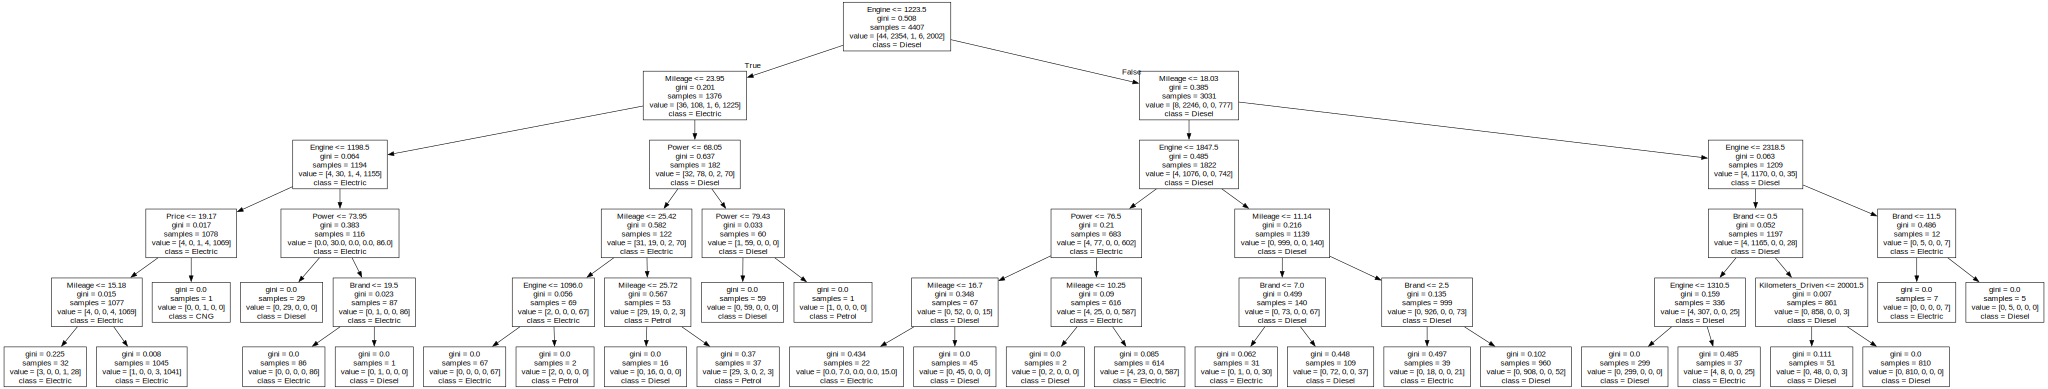

In [ ]:
## 모델 파일 dot ===> 시각화
# 파일 열기
with open('india_car.dot') as f:
	data = f.read()

## 파일에서 가져온 데이터 시각화
graphviz.Source(data)

In [ ]:
# 특성 중요도 출력
importances = dtModel.feature_importances_
for feature, importance in zip(featureDF, importances):
    print(f"{feature}: {importance:.4f}")

# # 시각화
# plt.figure(figsize=(10,5))
# plt.bar(newDF, importances)
# plt.xlabel("Features")
# plt.ylabel("Importance")
# plt.title("Feature Importances")
# plt.show()

Kilometers_Driven: 0.0002
Transmission: 0.0000
Mileage: 0.2061
Engine: 0.6907
Power: 0.0778
Price: 0.0010
Brand: 0.0242
Ageofcar: 0.0000


In [ ]:
# 예측값 계산
pre_ = dtModel.predict(X_train)

accuracy = accuracy_score(y_train, pre_)
# percision = precision_score(y_train, pre_)
# recall = recall_score(y_train, pre_)
# f1 = f1_score(y_train, pre_)

# print(accuracy, percision, recall, f1)
accuracy

0.9607442704787837

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# 예측값 계산
pre_ = dtModel.predict(X_test)

accuracy = accuracy_score(y_test, pre_)
# percision = precision_score(y_train, pre_)
# recall = recall_score(y_train, pre_)
# f1 = f1_score(y_train, pre_)

# print(accuracy, percision, recall, f1)
accuracy

0.9611980939414567

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# 하이퍼파라미터 dict 생성
param = {}

# 모델 인스턴스 생성
t_model = KNeighborsClassifier()

# 교차검증과 튜닝 진행 인스턴스 생성
gridCV = GridSearchCV(t_model, param, scoring=('accuracy'), refit='True')

In [ ]:
gridCV.fit(X_train, y_train)

c:\Users\KDP-34\anaconda3\envs\AI\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(), param_grid={}, refit='True',
             scoring='accuracy')

In [ ]:
# 가장 좋은 모델
best_model = gridCV.best_estimator_

In [ ]:
X_train.head()

,Kilometers_Driven,Transmission,Mileage,Engine,Power,Price,Brand,Ageofcar
S.No.,,,,,,,,
5769,20712,0,23.84,1199.0,84.00,11.62450,7,6
4612,81828,0,24.00,1186.0,73.97,9.09525,1,10
837,52625,0,24.00,1120.0,70.00,7.67150,1,9
339,38000,0,19.70,796.0,46.30,3.76875,0,13
5789,7858,0,25.17,799.0,53.30,6.36500,10,6


In [ ]:
# # 사용자 입력 데이터 => 모델 데이터 형태 
# user_data = pd.DataFrame([[2015, 70000, 15, 1500, 2, 2, 2,2,2,2]], columns=featureDF.columns)
# user_data_ = scaler.transform(user_data)

In [ ]:
# # 교차 검증 및 튜닝 후 결과
# print(f'가장 좋은 성능의 cv 번호 : {gridCV.best_index_}')
# print(f'가장 좋은 성능의 하이퍼파라미터 조합 : {gridCV.best_params_}')
# print(f'가장 좋은 성능의 점수 : {gridCV.best_score_}')
# print(f'가장 좋은 성능의 재학습된 모델객체 : {gridCV.best_estimator_}')

In [ ]:
# # 모델로 예측하기
# best_model.predict(user_data_)

# Decision Tree의 장점

1. 피쳐 중요도 확인할 때

In [ ]:
# Decision Tree의 모델 파라미터 : 피쳐 중요도 확인 
# best_model.feature_importances_

In [ ]:
# for f_name, f_importances in zip(X_train.columns, best_model.feature_importances_):
#     print(f_name, f_importances)